In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from IPython.core.display import display, HTML

In [2]:
# Reading in CSV
df = pd.read_csv('data/charts.csv')
df.head(5)

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [3]:
# Dataframe overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [4]:
# Min and max dates
print(min(df['date']))
print(max(df['date']))

2017-01-01
2021-12-31


In [5]:
# Getting the value counts of the Top 10 artists, featuring Bad Bunny
df['artist'].value_counts().nlargest(10)

Ed Sheeran         387917
Billie Eilish      251825
Post Malone        211272
Bad Bunny          203403
Ariana Grande      189914
Dua Lipa           187085
Drake              177380
Imagine Dragons    157900
XXXTENTACION       155458
BTS                154338
Name: artist, dtype: int64

In [6]:
# Isolating data that only features BadBunny as the artist and keeping only top200 data
topbb = df[(df["artist"] == "Bad Bunny") & (df["chart"] == "top200")]
# topbb.to_csv('data/badbunny_top200.csv', index=False)
topbb.head(5)

,title,rank,date,artist,url,region,chart,trend,streams
2216,Soy Peor,7,2017-01-01,Bad Bunny,https://open.spotify.com/track/5MT96Zz0ymUJNm8...,Dominican Republic,top200,MOVE_DOWN,6170.0
5870,Soy Peor,65,2017-01-01,Bad Bunny,https://open.spotify.com/track/5MT96Zz0ymUJNm8...,Panama,top200,MOVE_DOWN,1559.0
10041,Soy Peor,135,2017-01-02,Bad Bunny,https://open.spotify.com/track/5MT96Zz0ymUJNm8...,Chile,top200,NEW_ENTRY,9603.0
10270,Soy Peor,165,2017-01-02,Bad Bunny,https://open.spotify.com/track/5MT96Zz0ymUJNm8...,Colombia,top200,NEW_ENTRY,3574.0
10882,Soy Peor,2,2017-01-02,Bad Bunny,https://open.spotify.com/track/5MT96Zz0ymUJNm8...,Dominican Republic,top200,MOVE_UP,7129.0


# Global Analysis

In [7]:
# Global averages sorted by streams in the Top200
global_avg_streams = topbb.loc[topbb['region']=='Global'].groupby('title').mean().round().sort_values('streams', ascending = False)
# global_avg_streams

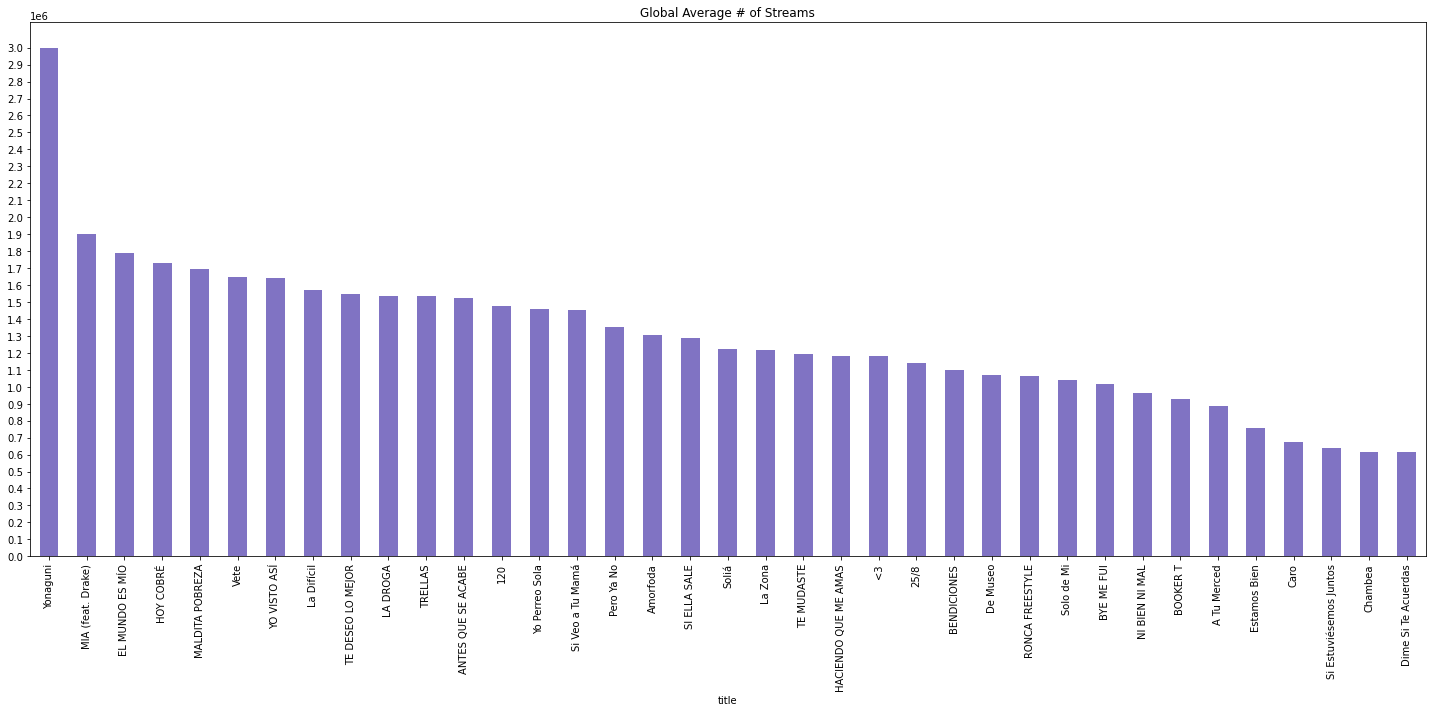

In [8]:
# Plotting Global Average streams with pandas
plot_g_a_streams = global_avg_streams['streams'].plot(kind ='bar', title='Global Average # of Streams', figsize=(20,10), yticks = range(0, 3100000, 100000), color='#8073c3')
plot_g_a_streams

plt.tight_layout()
plt.savefig("plots/global_avg_streams.png")

In [9]:
# Global averages sorted by rank
global_avg_rank = topbb.loc[topbb['region']=='Global'].groupby('title').mean().round().sort_values('rank')
# global_avg_rank 

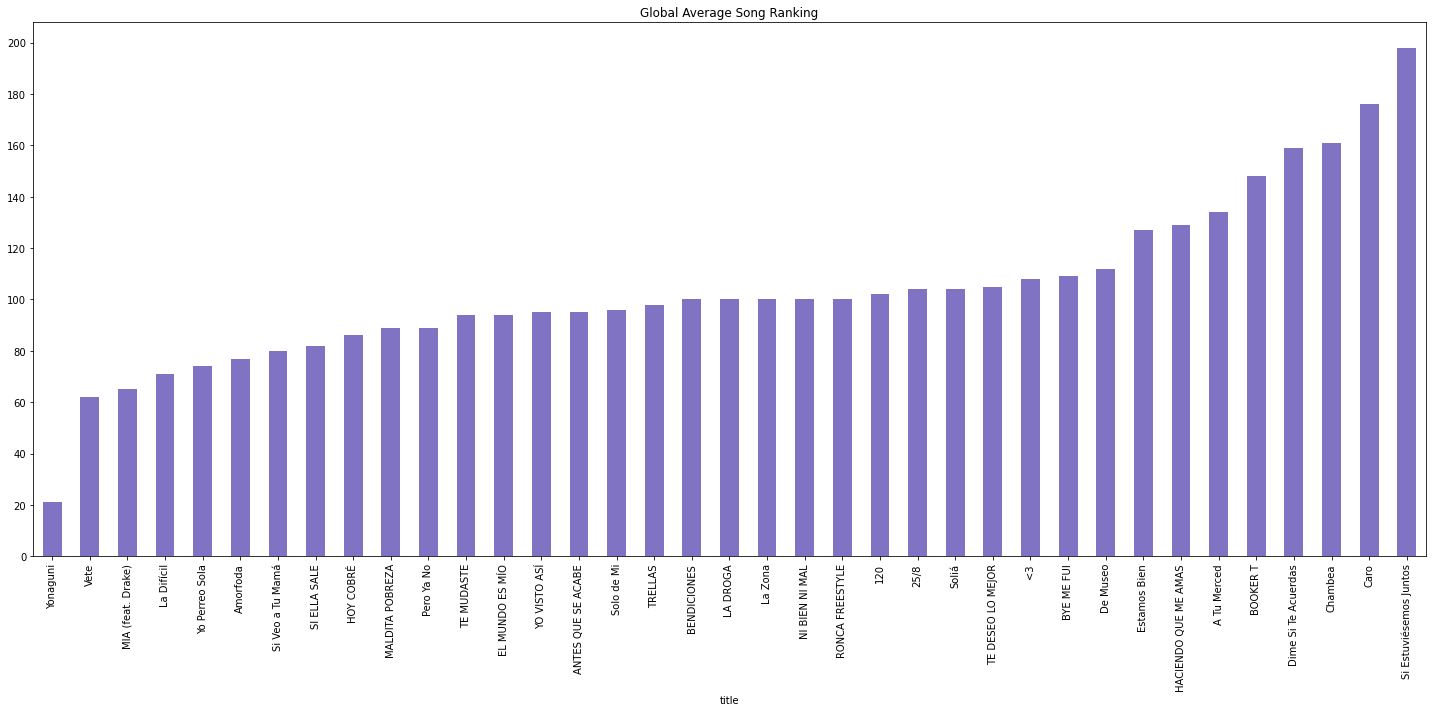

In [10]:
# Plotting global average rank with pandas
plot_g_a_rank = global_avg_rank['rank'].plot(kind = 'bar', title= 'Global Average Song Ranking', figsize=(20,10), yticks = range(0, 220, 20), color='#8073c3' )
plot_g_a_rank

plt.tight_layout()
plt.savefig("plots/global_avg_rank.png")

In [11]:
# Creating dataframe called n_days with columns: 'artist', 'title', 'Number of days in Global Top200'
# https://www.kaggle.com/code/alperenkaran/spotify-top50-charts-analysis/notebook?scriptVersionId=88893676 
topbb_global = topbb[topbb['region'] == 'Global']
topbb_global.dropna()
n_days = topbb_global.groupby(['artist', 'title'])['date'].count().reset_index()
n_days.columns = ['artist', 'title', 'Number of days in Global Top200']

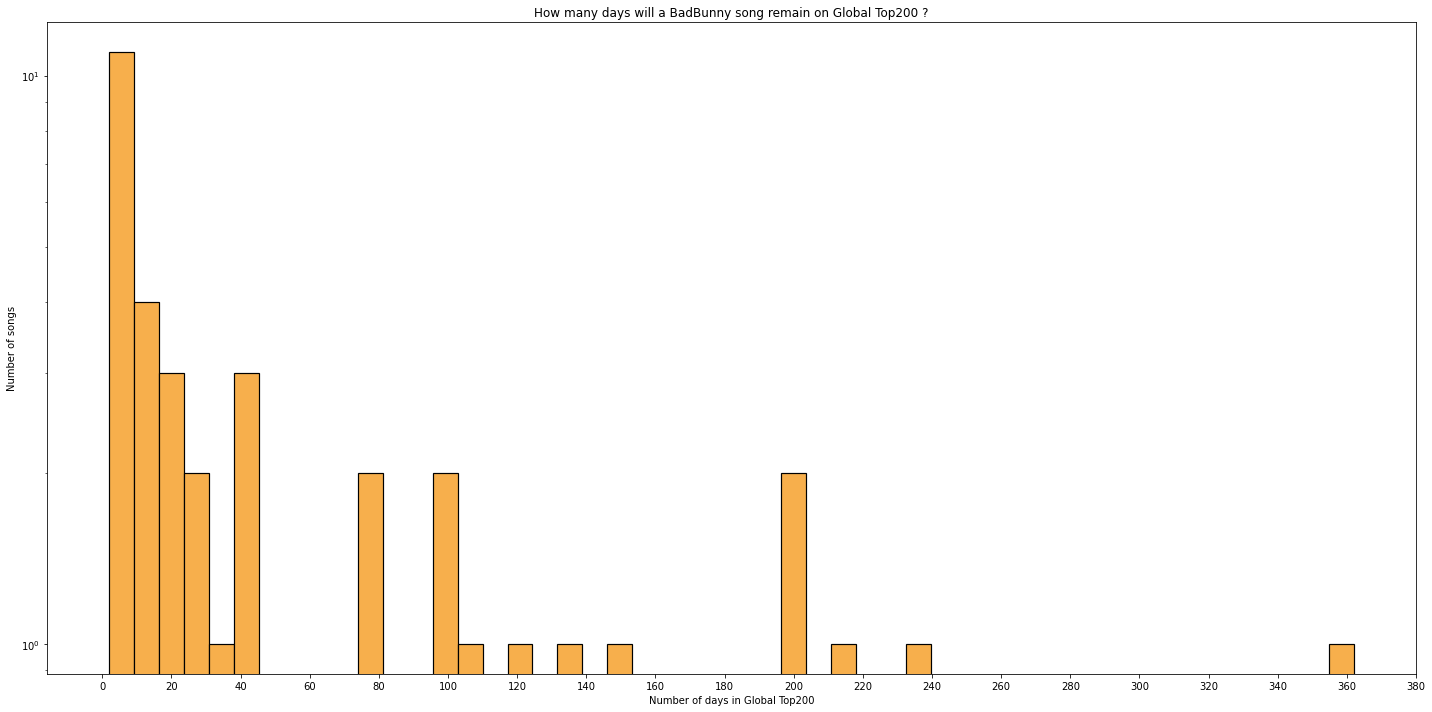

In [12]:
# Using matplotlib to chart how many days BadBunny songs are in the Global Top200
plt.figure(figsize=(20,10))
plt.hist(n_days['Number of days in Global Top200'], bins=50, color ='#f7af4c', edgecolor='black', linewidth=1.2)
plt.yscale('log')
plt.title('How many days will a BadBunny song remain on Global Top200 ?')
plt.xlabel('Number of days in Global Top200')
plt.ylabel('Number of songs')
plt.locator_params(axis='x', nbins=25)  # more ticks on x-axis
plt.tight_layout()
plt.savefig("plots/days_top200.png")
plt.show()

In [13]:
# Songs that charted,
n_days.sort_values(by='Number of days in Global Top200', ascending=False)

,artist,title,Number of days in Global Top200
21,Bad Bunny,MIA (feat. Drake),362
35,Bad Bunny,Yo Perreo Sola,238
33,Bad Bunny,Vete,214
36,Bad Bunny,Yonaguni,200
31,Bad Bunny,TE MUDASTE,200
18,Bad Bunny,La Difícil,147
27,Bad Bunny,Si Veo a Tu Mamá,138
5,Bad Bunny,Amorfoda,120
22,Bad Bunny,NI BIEN NI MAL,103
29,Bad Bunny,Solo de Mi,98


In [14]:
# correlations = [df['streams'].corr(df['rank']) for date, df in topbb_global.groupby('date')]

# plt.figure(figsize=(20,10))
# plt.hist(correlations, bins=50, color ='teal', edgecolor='black', linewidth=1.2)
# plt.xlabel('Correlation')
# plt.ylabel('Number of days')
# plt.title('Correlation of rank with streams')
# plt.tight_layout()
# plt.show()

# Global Analysis Takeaways

### Streams
Looking at the top 3, Yonaguni was BadBunny's second 2021 single, after dropping three albums in 2020, the last one El Ultimo Tour Del Mundo, marking his place as a global artist. This can be argued given that apart from the 1 and 2 rank the top 5 songs are all from El Ultimo Tour Del Mundo. MIA(feat. Drake) can be argued as the moment BadBunny was introduced to the global market, his 'cross-over' song, if you will. 
### Rank
Looking again at the Top 3 songs, you can see the story of BadBunny's rise developing. MIA feat.Drake is released in 2018, his cross-over song. Vete is released a year later in 2019, as a solo release before dropping his first album of 2020 YHLQMDLG. Then, already a certified SuperStar Yonaguni is released in 2021, becoming his highest ranked song globally. 

# Top 3 Ranked Songs Analysis

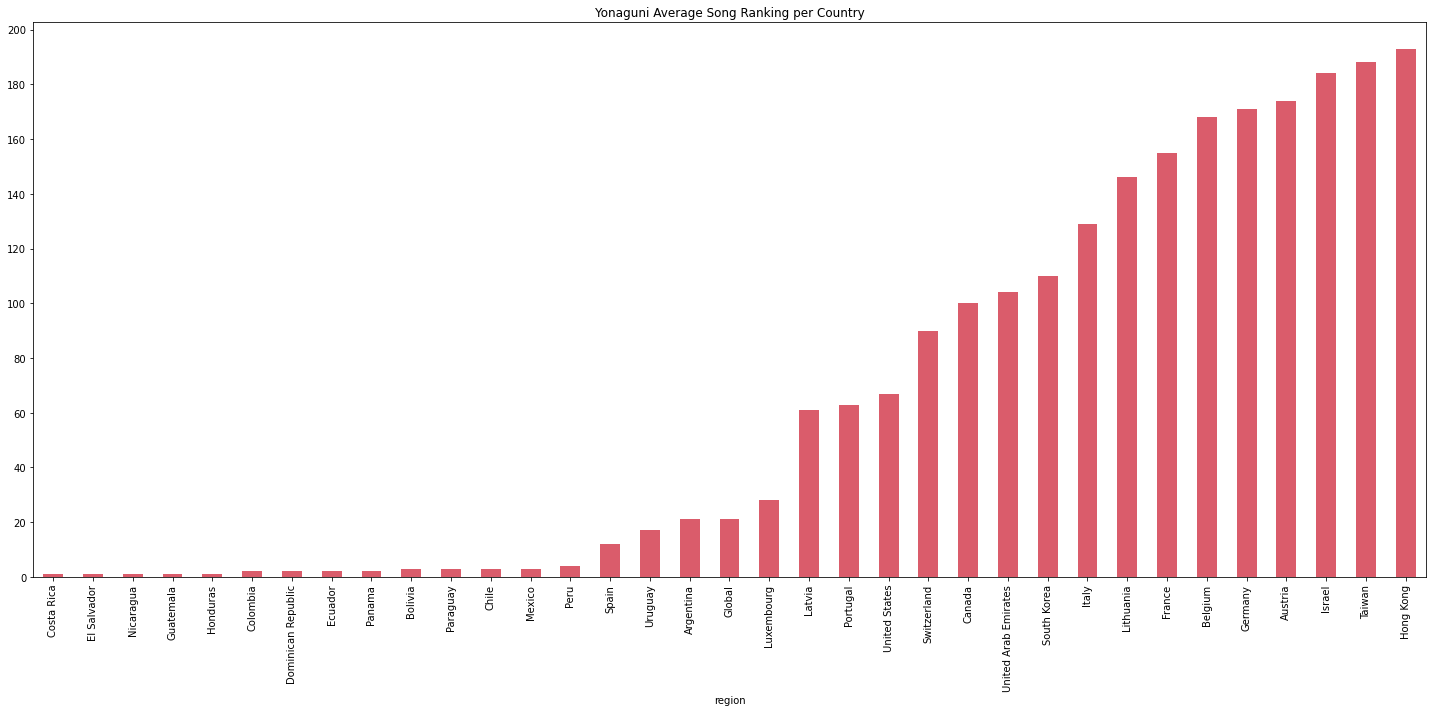

In [15]:
# Avg rank of Yonaguni for each region 
yona_rank = topbb.loc[topbb['title']=='Yonaguni'].groupby('region').mean().round().sort_values('rank')
plot_yona_rank = yona_rank['rank'].plot(kind = 'bar', title= 'Yonaguni Average Song Ranking per Country', figsize=(20,10), yticks = range(0, 220, 20), color = '#da5c6b')
plot_yona_rank

plt.tight_layout()
plt.savefig("plots/country_avg_rank_yonaguni.png")

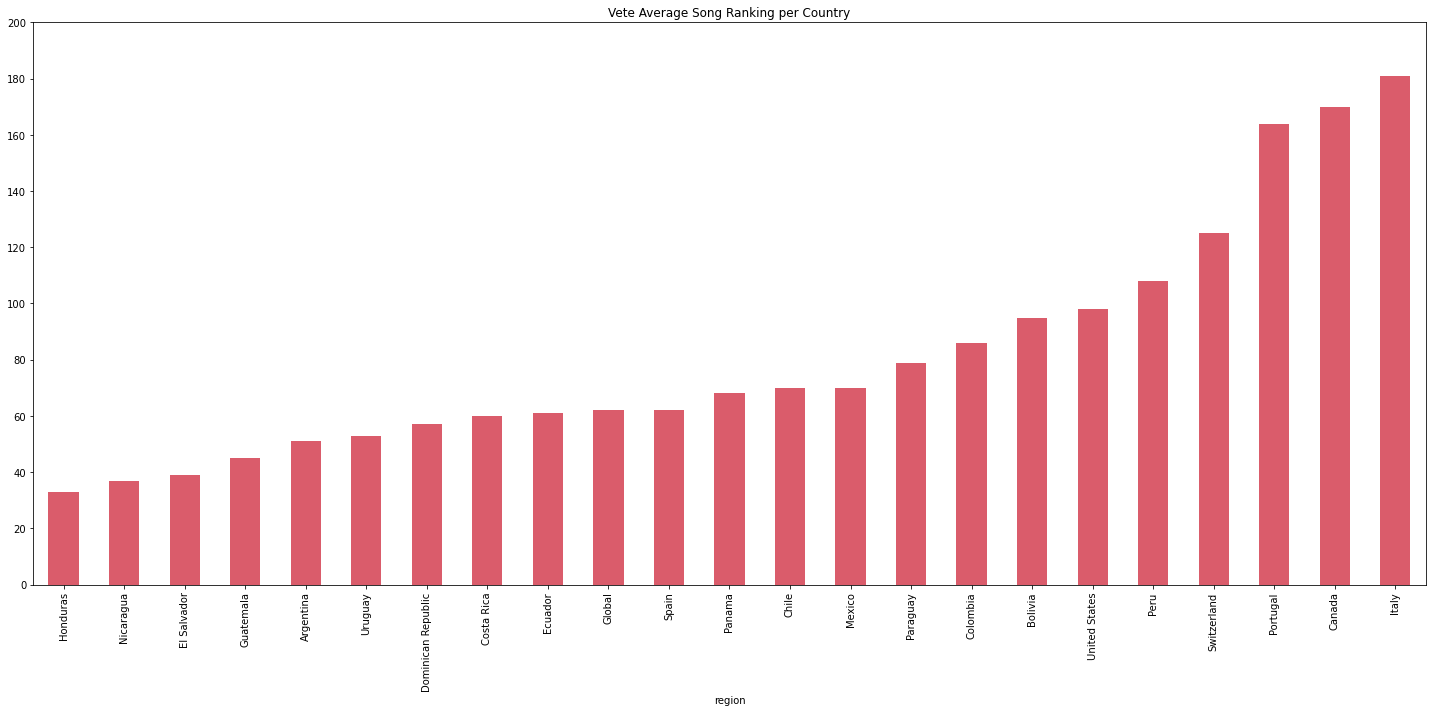

In [16]:
# Avg rank of Vete for each region 
vete_rank = topbb.loc[topbb['title']=='Vete'].groupby('region').mean().round().sort_values('rank')
plot_vete_rank = vete_rank['rank'].plot(kind = 'bar', title= 'Vete Average Song Ranking per Country', figsize=(20,10), yticks = range(0, 220, 20), color = '#da5c6b')
plot_vete_rank

plt.tight_layout()
plt.savefig("plots/country_avg_rank_vete.png")

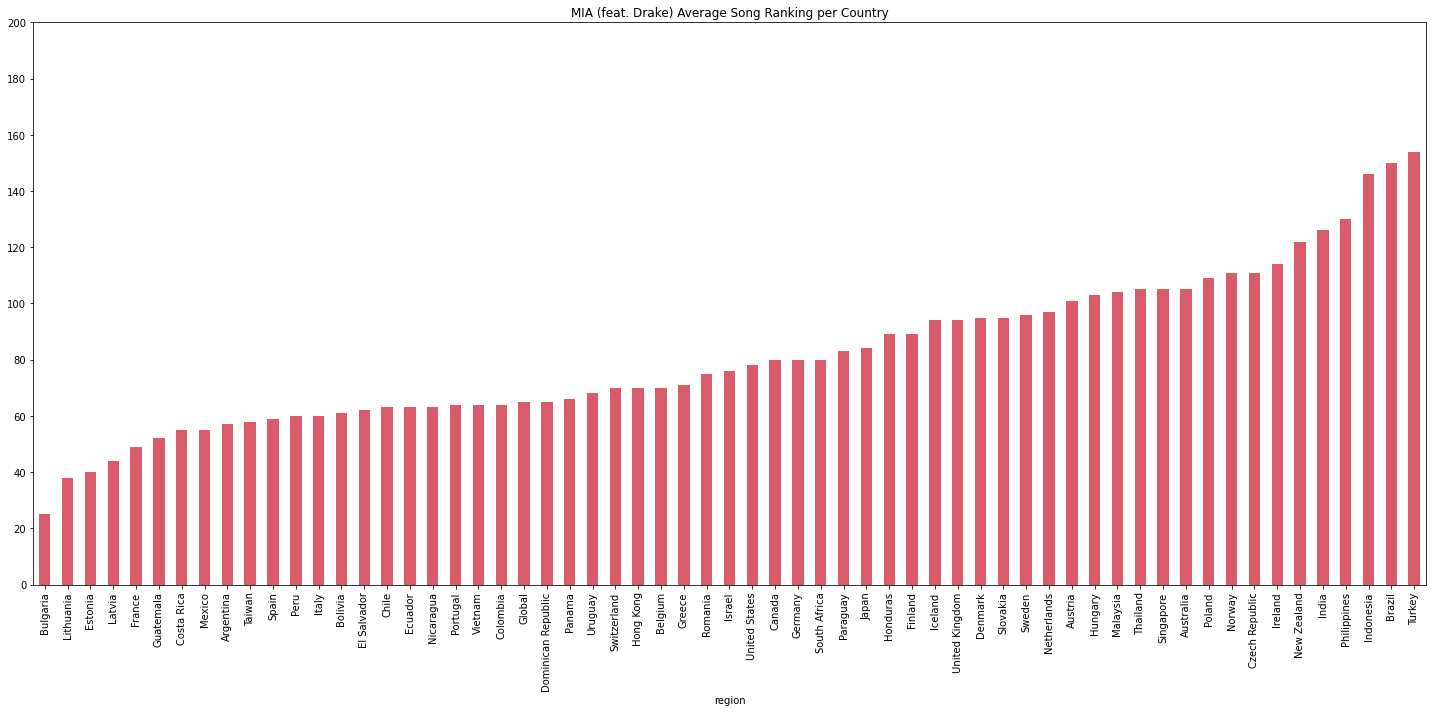

In [17]:
# Avg rank of Mia(feat. Drake) for each region 
mia_rank = topbb.loc[topbb['title']=='MIA (feat. Drake)'].groupby('region').mean().round().sort_values('rank')
plot_mia_rank = mia_rank['rank'].plot(kind = 'bar', title= 'MIA (feat. Drake) Average Song Ranking per Country', figsize=(20,10), yticks = range(0, 220, 20), color= '#da5c6b')
plot_mia_rank

plt.tight_layout()
plt.savefig("plots/country_avg_rank_mia.png")

In [18]:
# Noting how many counties each song was ranked Top200 
yona_len = len(yona_rank)
mia_len = len (mia_rank)
vete_len = len(vete_rank)

print(f"{yona_len} countries featured Yonaguni as a Top200 song.")
print(f"{mia_len} countries featured MIA (feat.Drake) as a Top200 song.")
print(f"{vete_len} countries featured Vete as a Top200 song.")

35 countries featured Yonaguni as a Top200 song.
61 countries featured MIA (feat.Drake) as a Top200 song.
23 countries featured Vete as a Top200 song.


# Top 3 Ranked Songs Takeaways
### Yonaguni 
was a huge success and it ranked high among Spanish speaking countries, it's interesting to note that Central American countries average ranking of the song num 1. Looking at the difference in Vete and Yonaguni length, more countries had BadBunny as a Top200 artist, suggesting his rise as a global artist. Also given that the song at the end features a section of him singing in Japanese the song features Asian countries, which previously was not a region that showed much interest in BadBunny when compared to Vete.
### Vete
mainly did well in Spanish speaking countries, with Central American countries embracing the first single pre-YHLGMDLG. This is the first single coming off of the MIA feat. Drake suggesting that is cross-over song was successful in attracting new listeners.
### Mia (feat.Drake)
a song featuring Drake, had a higher average ranking in European countries and also ranked for more regions. This is likely due to Drake's feature and the expanded audience which now includes Drake fans. This is arguably BadBunny's cross-over single, that one can argue yielded success. 

# Top 3 Ranked Songs Over Time

In [19]:
mia_feat = topbb_global[topbb_global['title'] == 'MIA (feat. Drake)'].sort_values(by='date').reset_index(drop=True)

In [20]:
vete = topbb_global[topbb_global['title'] == 'Vete'].sort_values(by='date').reset_index(drop=True)

In [21]:
yonaguni = topbb_global[topbb_global['title'] == 'Yonaguni'].sort_values(by='date').reset_index(drop=True)

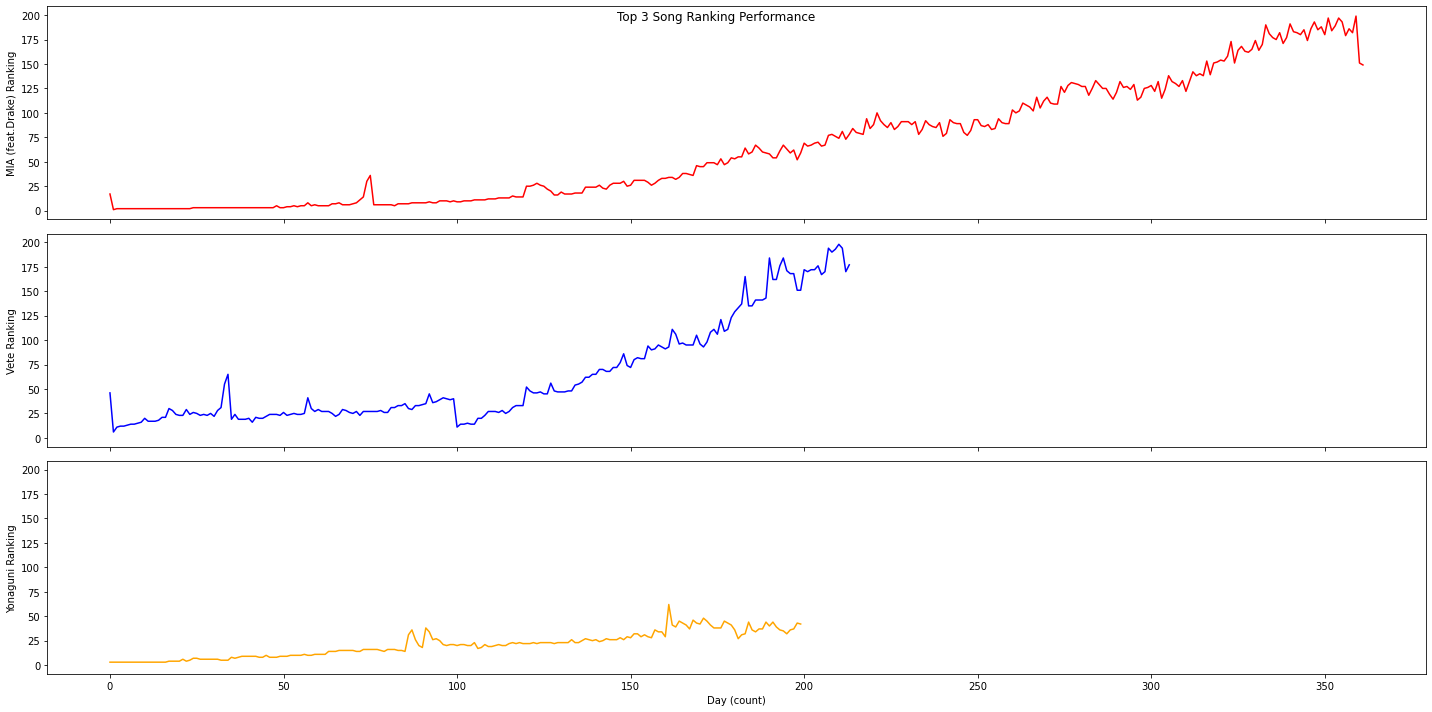

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10), sharey=True, sharex=True)
fig.suptitle('Top 3 Song Ranking Performance')

ax1.plot(mia_feat['rank'], color='red')
ax1.set_ylabel('MIA (feat.Drake) Ranking')

ax2.plot(vete['rank'], color='blue')
ax2.set_ylabel('Vete Ranking')

ax3.plot(yonaguni['rank'], color='orange')
ax3.set_xlabel('Day (count)')
ax3.set_ylabel('Yonaguni Ranking')
fig.tight_layout()

plt.savefig("plots/top3_performance.png")
plt.show()